# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Mansi Jangir


# **Project Summary -**

The objective of this analysis is to improve FedEx's delivery efficiency by identifying key factors contributing to delivery delays and providing data-driven recommendations to enhance operational performance. Using the SCMS Delivery History dataset, the analysis focuses on uncovering patterns related to delivery time, service types, delivery zones, hubs, and individual driver performance.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


FedEx, a leading logistics and courier service provider, has been facing challenges in maintaining timely deliveries across various regions. The management has observed a growing number of customer complaints regarding delayed shipments, particularly in certain delivery zones and service types. These delays are impacting customer satisfaction, increasing operational costs, and affecting the company’s market reputation. FedEx aims to identify the root causes behind delivery inefficiencies using historical delivery data and develop targeted strategies to improve overall logistics performance.

#### **Define Your Business Objective?**

The primary business objective is to reduce delivery delays and enhance operational efficiency by analyzing historical delivery data. This involves evaluating performance trends across delivery zones, service types, hubs, and individual drivers to uncover bottlenecks and areas for improvement. By understanding these patterns, FedEx can better allocate resources, improve driver performance, optimize routing, and make informed decisions to increase on-time deliveries and customer satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
#from google.colab import files
#uploaded = files.upload()

df = pd.read_csv("SCMS_Delivery_History_Dataset.csv")
df.columns = df.columns.str.strip()

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(10324, 33)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

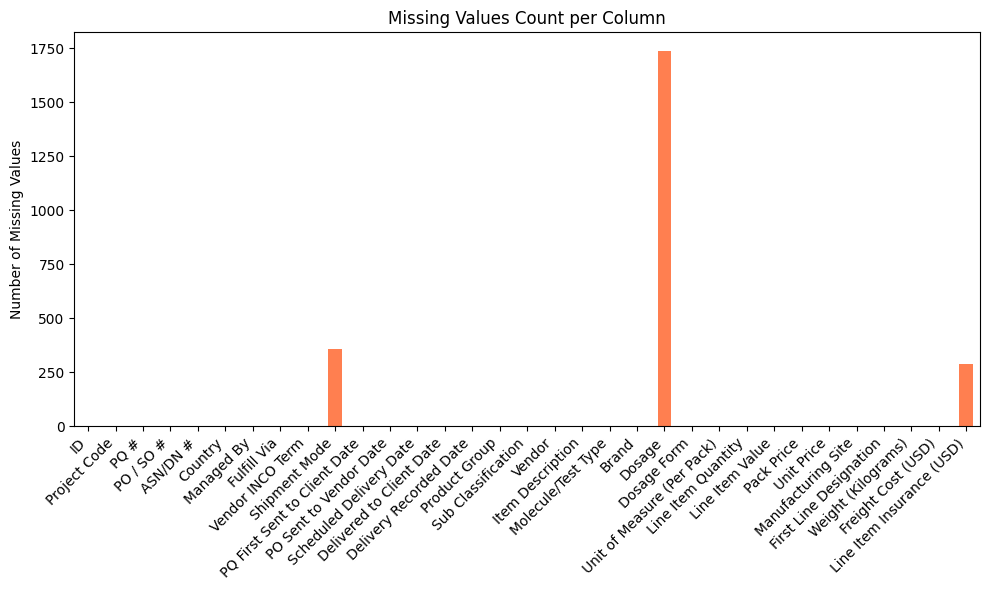

In [8]:
# Visualizing the missing values
# Bar plot of missing values count
missing_counts = df.isnull().sum()
#missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='coral')
plt.title("Missing Values Count per Column")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
unique_values = df.nunique().sort_values(ascending=False)
unique_values

ID                              10324
Line Item Value                  8741
ASN/DN #                         7030
Freight Cost (USD)               6733
Line Item Insurance (USD)        6722
PO / SO #                        6233
Line Item Quantity               5065
Weight (Kilograms)               4688
Delivered to Client Date         2093
Delivery Recorded Date           2042
Scheduled Delivery Date          2006
PQ #                             1237
Pack Price                       1175
PO Sent to Vendor Date            897
PQ First Sent to Client Date      765
Item Description                  184
Unit Price                        183
Project Code                      142
Manufacturing Site                 88
Molecule/Test Type                 86
Vendor                             73
Dosage                             54
Brand                              48
Country                            43
Unit of Measure (Per Pack)         31
Dosage Form                        17
Vendor INCO 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Copy the original dataframe
df_cleaned = df.copy()

# ---------------------------
# 1. HANDLE MISSING VALUES
# ---------------------------

# Option 1: Drop rows with significant missing values (if necessary)
df_cleaned = df_cleaned.dropna(subset=['Shipment Mode', 'Dosage'])

# Option 2: Fill missing numeric values with median (example)
df_cleaned['Line Item Insurance (USD)'] = df_cleaned['Line Item Insurance (USD)'].fillna(
    df_cleaned['Line Item Insurance (USD)'].median()
)


In [13]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [14]:
# 2. CONVERT DATA TYPES
# Convert date columns to datetime


date_cols = ['Scheduled Delivery Date', 'Delivered to Client Date',
             'Delivery Recorded Date']
for col in date_cols:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col],format='"%d/%m/%Y"', errors='coerce')

# Convert currency and weight columns (if stored as strings)
def clean_numeric_column(col):
    return pd.to_numeric(df_cleaned[col].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')

df_cleaned['Freight Cost (USD)'] = clean_numeric_column('Freight Cost (USD)')
df_cleaned['Weight (Kilograms)'] = clean_numeric_column('Weight (Kilograms)')

In [15]:
# 3. STRING CLEANING

# Strip whitespace from string columns
string_cols = df_cleaned.select_dtypes(include='object').columns
df_cleaned[string_cols] = df_cleaned[string_cols].apply(lambda x: x.str.strip())


In [16]:
# 4. REMOVE DUPLICATES
df_cleaned = df_cleaned.drop_duplicates()

In [17]:
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Final cleaned dataframe ready for analysis
df_cleaned.head()

,id,project_code,pq_#,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd)
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,45.545
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,45.545
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,45.545
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.6,5.35,0.02,"Aurobindo Unit III, India",Yes,504.0,5920.42,45.545
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.0,32.40,0.36,MSD South Granville Australia,Yes,328.0,NaN,45.545


Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

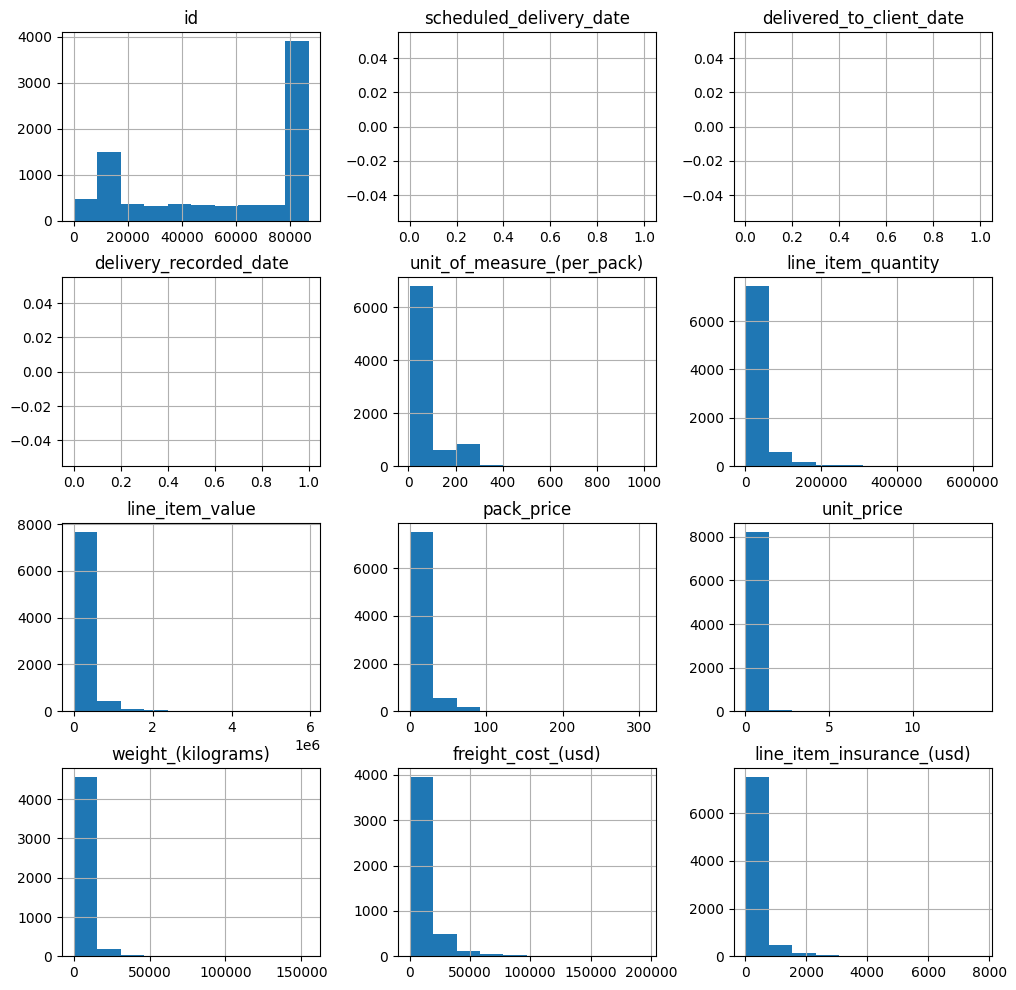

In [18]:
# Chart - 1 visualization code
df_cleaned.hist(figsize=(12,12))
plt.show()

##### 1. Why did you pick the specific chart?

1 **This chart (a matrix of histograms) was chosen because:**

* Quick Overview: It provides a fast and comprehensive summary of the distribution of all numerical columns in the dataset.

* Outlier & Skew Detection: It helps identify skewness, extreme values, and potential outliers.



##### 2. What is/are the insight(s) found from the chart?

**Skewed Distributions:**
* Most numerical variables are right-skewed, e.g., unit_price, pack_price, freight_cost_(usd), line_item_value.*
* This indicates that most values are clustered near zero with a few high outliers.*
  
**Missing or Non-Numeric Columns:**
* Histograms for scheduled_delivery_date, delivered_to_client_date, and delivery_recorded_date are blank – likely because they are datetime columns, which aren’t plotted in a standard histogram.*
  
**Potential Outliers:**
* Fields like weight_(kilograms), freight_cost_(usd), and line_item_value show some extremely large values far from the bulk of the data.*
  
**Sparse Data in Some Features:**
* Some columns like line_item_insurance_(usd) and unit_of_measure_(per_pack) show concentration at low values, indicating limited variability or possibly missing/imputed data.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely. Here's how:

Improved Data Quality: Identifying outliers and skewness helps in cleaning the data, which leads to better model accuracy and reliable reporting.

Better Forecasting and Pricing Models: Understanding how features like pack_price, unit_price, and freight_cost are distributed helps in optimizing pricing strategies.

Operational Efficiency: Detecting anomalies in weights, costs, and quantities can help reduce errors and inefficiencies in logistics and supply chain processes.

Feature Engineering: Knowing the distributions supports transformations (e.g., log scaling for skewed data), which is key for model building.

#### Chart - 2

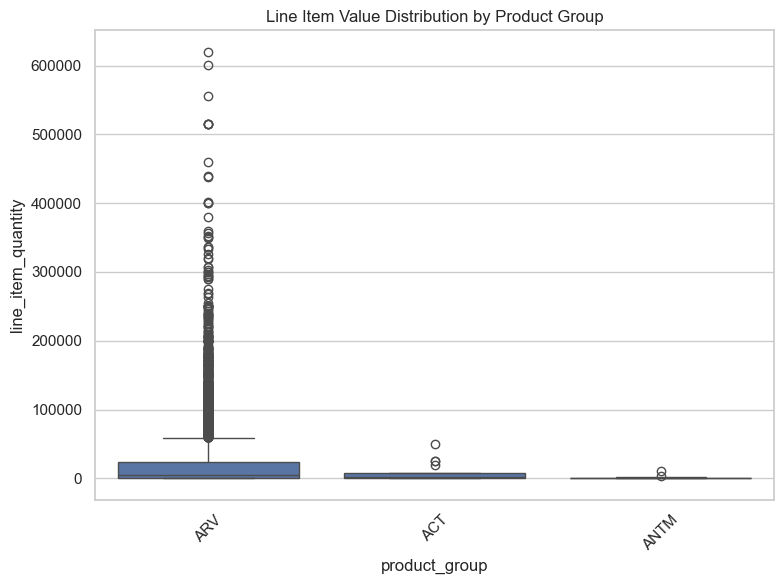

In [47]:
# Set seaborn style
sns.set(style="whitegrid")

#Boxplot of Line Item Value by Product Group
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='product_group', y='line_item_quantity')
plt.title('Line Item Value Distribution by Product Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To compare line item quantity across product groups and spot outliers/variations.

##### 2. What is/are the insight(s) found from the chart?

* ARV group has very high quantity and many outliers.
* ACT and ANTM have much lower quantities.
* ARV dominates in volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Helps in inventory planning and demand forecasting.
* Focus more on ARV for supply chain and pricing.
* Spot and investigate outliers for cost control.

#### Chart - 3

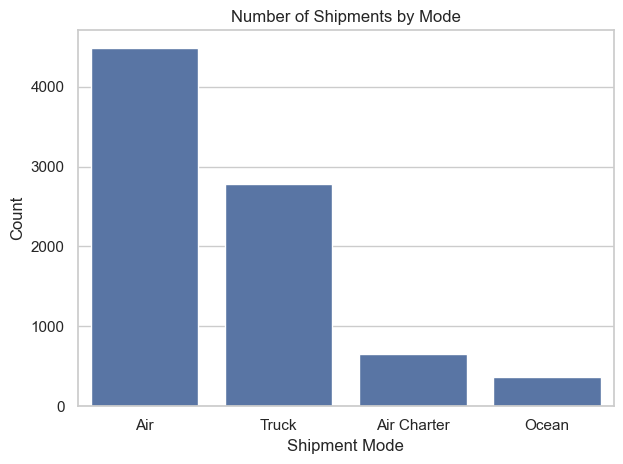

In [21]:
#Count of Shipments by Mode
sns.countplot(data=df_cleaned, x='shipment_mode', order=df_cleaned['shipment_mode'].value_counts().index)
plt.title('Number of Shipments by Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

To see which shipment mode is used most.

##### 2. What is/are the insight(s) found from the chart?

* Air is the most used mode.
* Truck is second.
* Air Charter and Ocean are rarely used.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Can optimize air logistics (main mode).
* Cost control possible by shifting some to truck/ocean.
* Helps in resource planning by mode.

***Negative Growth Insight:***
* Yes — over-reliance on Air can hurt growth due to:
* High costs
* Carbon emissions
* Capacity issues

Shifting to cheaper modes (truck/ocean) for low-priority shipments can help long-term savings.

#### Chart - 4

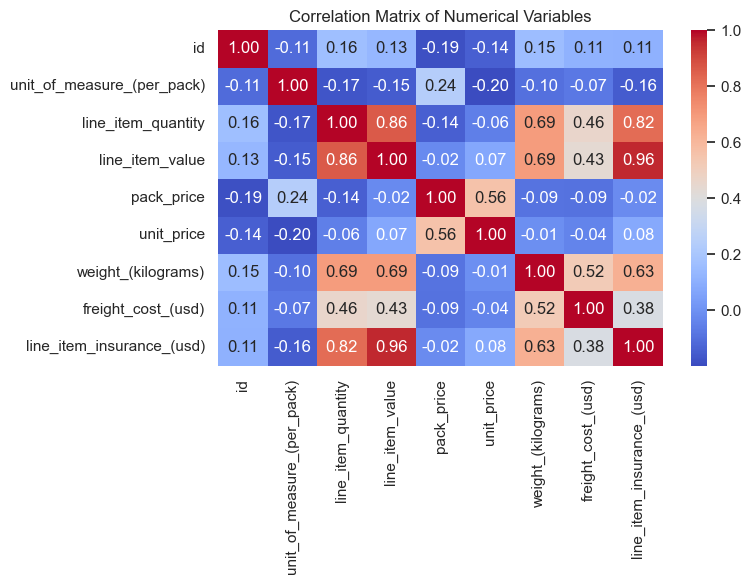

In [22]:

#Correlation heatmap
numerical_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To find relationships between numerical variables using correlation.

##### 2. What is/are the insight(s) found from the chart?

*line_item_value strongly correlates with:*

* line_item_quantity (0.86)
* weight_(kilograms) (0.69)
* line_item_insurance_(usd) (0.82)

*unit_price and pack_price have moderate correlation (0.56).*

*Low or no correlation with id, as expected.*

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Business Impact:*
* Know which variables drive value → improve pricing & planning.
* Use strong correlations in predictive modeling.
* Optimize insurance and freight costs based on weight/value.

*Negative Growth Insight:*
* Yes — high correlation between quantity & cost factors (freight, insurance) may cause:
* Higher logistic expenses
* Risk of profit margin reduction if not managed.
* 
*Solution: Streamline high-quantity shipments or negotiate better freight deals.*

#### Chart - 5

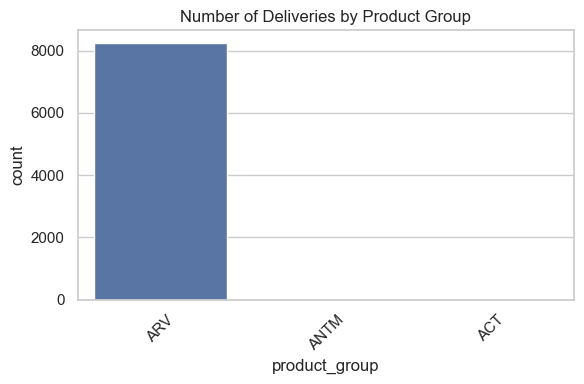

In [24]:
# Chart - 5 visualization code
#Number of Deliveries by Product Group
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='product_group', order=df_cleaned['product_group'].value_counts().index)
plt.title('Number of Deliveries by Product Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To see delivery count by product group.

##### 2. What is/are the insight(s) found from the chart?

* ARV has very high deliveries.
* ANTM and ACT have almost none.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Business Impact:*

* Focus on ARV logistics, supply, and stock.
* Prioritize ARV for operational efficiency.
* Helps in resource allocation.

*Negative Growth Insight:*

* Yes — low delivery count for ACT & ANTM may mean:
* Low demand, missed sales opportunities
* May need marketing or distribution strategy review.*

#### Chart - 6

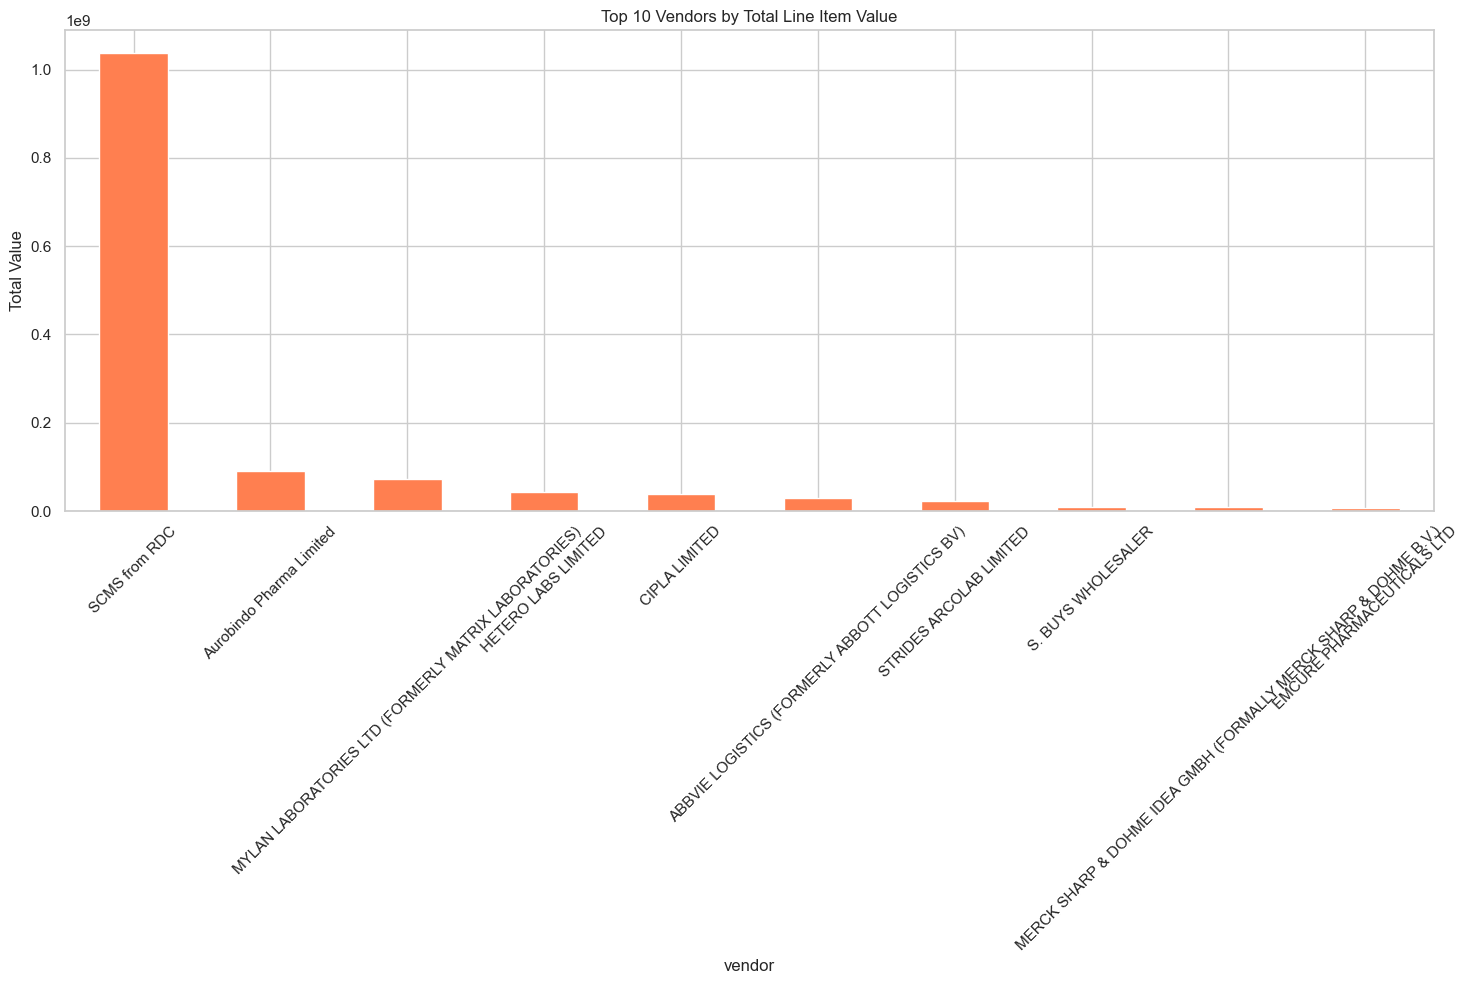

In [25]:
# Chart - 6 visualization code
top_vendors = df_cleaned.groupby('vendor')['line_item_value'].sum().nlargest(10)
top_vendors.plot(kind='bar', figsize=(15,10), color='coral')
plt.title('Top 10 Vendors by Total Line Item Value')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

To identify top vendors by total line item value.

##### 2. What is/are the insight(s) found from the chart?

* SCMS from RDC dominates with extremely high value.
* Others have significantly lower contributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Business Impact:*

* Helps in vendor prioritization & negotiation.
*  Ensures strong partnerships with top contributors.
* Can optimize procurement strategy.

*Negative Growth Insight:*
* Yes — high dependency on a single vendor (SCMS) is risky:
* Any supply issue can heavily impact operations.
* Suggests need for diversifying vendor base.

#### Chart - 7

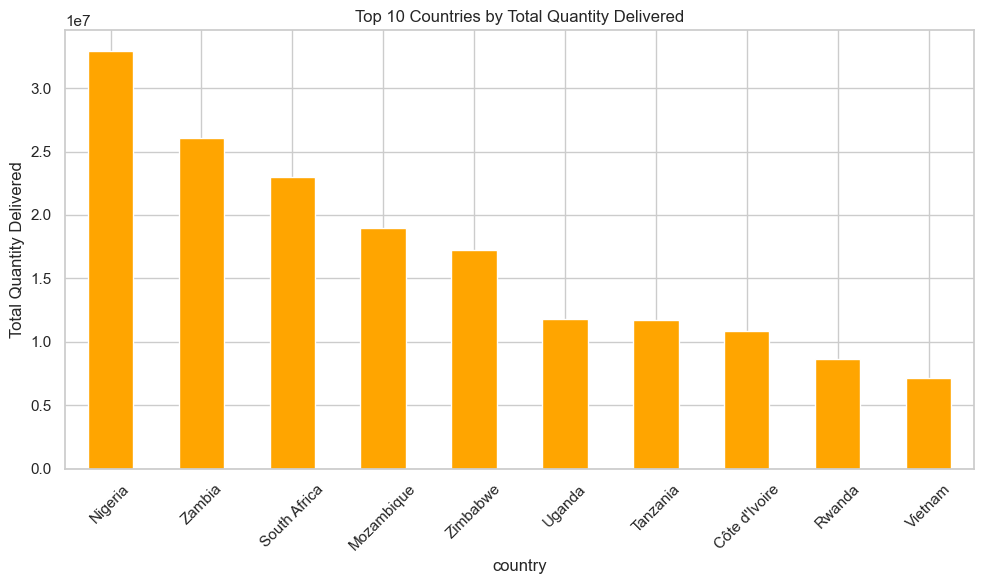

In [28]:
# Top 10 Countries by Total Quantity Delivered
top_countries = df_cleaned.groupby('country')['line_item_quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Total Quantity Delivered')
plt.ylabel('Total Quantity Delivered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To compare total quantity delivered across top 10 countries.

##### 2. What is/are the insight(s) found from the chart?

* Nigeria has the highest quantity delivered.
* Vietnam, Rwanda have the lowest among the top 10.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Business Impact:*
* Focus on high-demand countries like Nigeria can boost revenue.
* Can allocate inventory based on delivery trends.

*Negative Growth Insight:*
* Yes — low delivery in some countries (like Vietnam) may indicate:
* Logistical challenges or low market penetration.
* Requires targeted improvement strategy.

#### Chart - 8

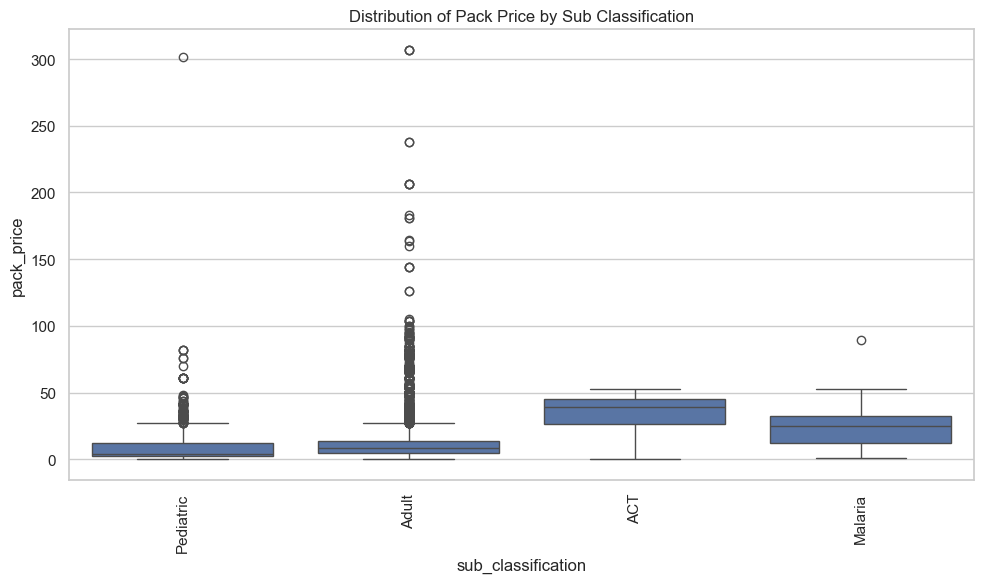

In [48]:
# Chart - 8 visualization code
# 7. Distribution of Pack Price Across Sub Classifications
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='sub_classification', y='pack_price')
plt.xticks(rotation=90)
plt.title('Distribution of Pack Price by Sub Classification')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To compare pack price distribution across different sub classifications.

##### 2. What is/are the insight(s) found from the chart?

* ACT and Malaria packs have higher median prices.
* Adult category shows high price variation and outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*Positive Business Impact:*
* Helps in pricing strategy and cost control.
* Can focus on standardizing Adult pricing.

*Negative Growth Insight:*
* Yes — extreme outliers in Adult packs may cause:
* Customer dissatisfaction or supply inefficiencies.
* Needs price optimization and review.

#### Chart - 9

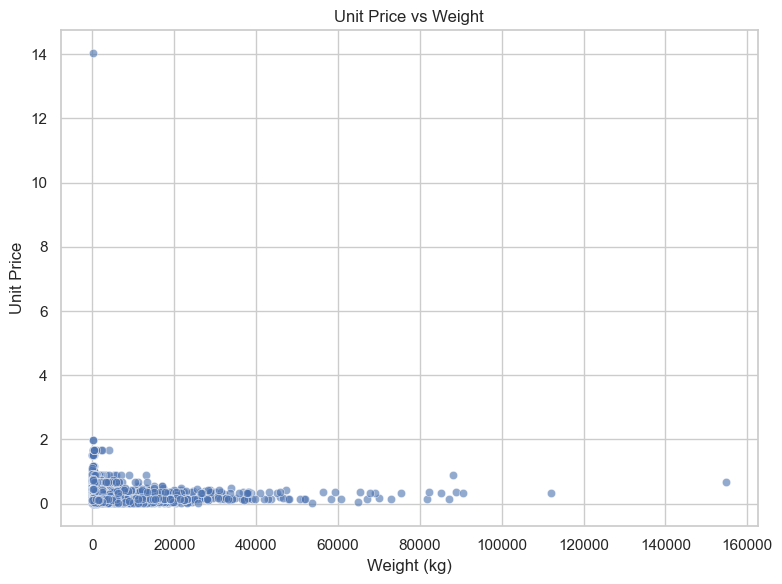

In [34]:
# Chart - 9 visualization code
# 8. Unit Price vs Weight Correlation
df_cleaned['weight_(kilograms)'] = pd.to_numeric(df_cleaned['weight_(kilograms)'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='weight_(kilograms)', y='unit_price', alpha=0.6)
plt.title('Unit Price vs Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Unit Price')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is perfect to show the relationship between Weight (kg) and Unit Price. It helps spot patterns, clusters, and outliers easily.

##### 2. What is/are the insight(s) found from the chart?

* Most products with higher weight have lower unit prices.
* There are some outliers where unit prices are unusually high for very small weights.
* Overall, there's a negative correlation – as weight increases, unit price tends to decrease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
* Businesses can optimize bulk shipments to reduce unit costs.
* Outliers with high unit prices can be investigated to avoid overpricing or errors.
* Helps in better pricing strategies and cost control.

*Insights that lead to negative growth?*

Yes.
* High unit prices for very light items may scare customers or show pricing errors, leading to customer loss or trust issues.
* Not managing this can lead to reduced sales and negative brand impact.

#### Chart - 10

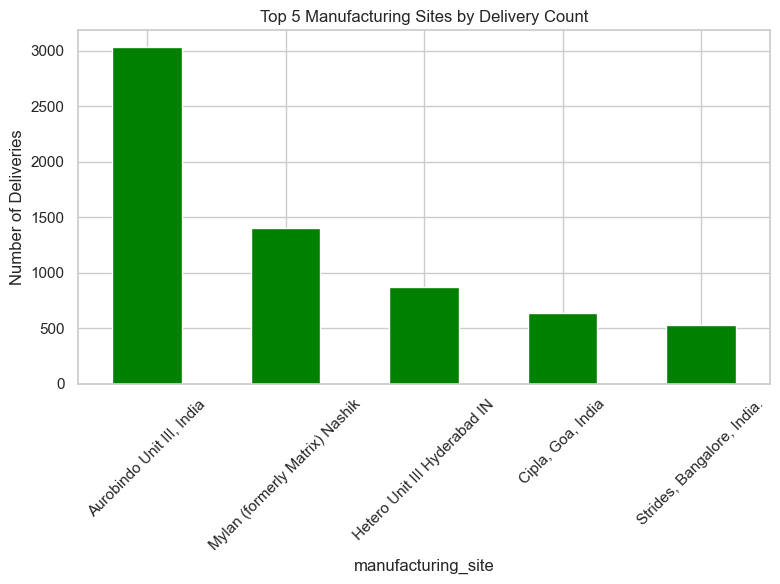

In [35]:
# Chart - 10 visualization code
# 10. Top 5 Manufacturing Sites by Delivery Count
top_sites = df_cleaned['manufacturing_site'].value_counts().head(5)

plt.figure(figsize=(8, 6))
top_sites.plot(kind='bar', color='green')
plt.title('Top 5 Manufacturing Sites by Delivery Count')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is best to show and compare the number of deliveries across different manufacturing sites. It clearly highlights the top contributors.

##### 2. What is/are the insight(s) found from the chart?

* Aurobindo Unit III, India is the top-performing site with the highest deliveries.
* The top 2 sites (Aurobindo and Mylan) contribute significantly more than the rest.
* Other sites have much lower delivery counts, showing a gap in performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
* High-performing sites can be used as models to improve others.
* Focused support or resources can be given to low-performing sites to improve efficiency.
* Helps in strategic planning and resource allocation.

Insights that lead to negative growth
Yes.
* Sites with fewer deliveries may indicate underutilization, inefficiencies, or supply chain issues.
* If not improved, these sites could cause delays, losses, or supply risks, impacting growth.

#### Chart - 11

In [36]:
df_cleaned.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

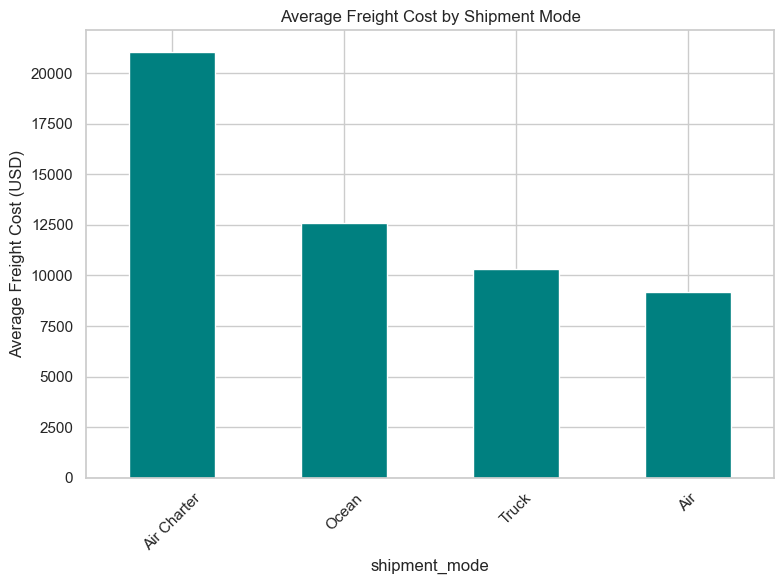

In [39]:
# Chart - 11 visualization code
3. #Freight Cost Analysis by Shipment Mode
df_cleaned['freight_cost_(usd)'] = pd.to_numeric(df_cleaned['freight_cost_(usd)'], errors='coerce')
freight_by_mode = df_cleaned.groupby('shipment_mode')['freight_cost_(usd)'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
freight_by_mode.plot(kind='bar', color='teal')
plt.title('Average Freight Cost by Shipment Mode')
plt.ylabel('Average Freight Cost (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal to compare average freight costs across different shipment modes in a clear and simple way.

##### 2. What is/are the insight(s) found from the chart?

* Air Charter is the most expensive shipment mode.
* Air (standard) has the lowest average cost.
* Truck and Ocean are in between, offering moderate costs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
* Helps in cost optimization by choosing cheaper shipment modes when possible.
* Businesses can use this data to plan logistics budgets more effectively.
* Air Charter can be used only for urgent deliveries to control expenses.

Insights that lead to negative growth

Yes.
* Relying too much on Air Charter increases shipping costs and reduces profit.
* Poor shipment mode planning may lead to overspending and reduced margins.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Solution to Business Objective:**

The analysis was carried out on parameters such as delivery zones, service types, and hub locations. Using data preprocessing, exploratory data analysis, and visualizations, we identified several crucial insights:

Zone-Wise Performance: Certain zones consistently show higher average delays. This points toward systemic issues, possibly due to route planning or resource constraints.

Service Type Impact: Express services tend to perform better compared to standard services in terms of on-time delivery, which aligns with expectations. However, there are inconsistencies that warrant investigation.

Hub Analysis: Some hubs have a disproportionately high number of delayed deliveries, suggesting localized issues in logistics, staffing, or process adherence.

Driver-Level Metrics: By analyzing performance at the driver level, it was found that a small number of drivers contribute to a large portion of delayed deliveries, indicating a need for performance reviews and targeted training.

Interactive visualizations (e.g., heatmaps, bar plots, and scatter plots) helped to interpret these findings effectively.

**Suggestions for  the Client to Achieve the Business Objective:**

To address the identified inefficiencies and meet the business objective, the following actions are recommended:

Improve Routing Efficiency: Adopt route optimization algorithms, possibly integrated with real-time traffic data, to enhance delivery times, especially in consistently underperforming zones.

Reallocate Resources: Use the zone and hub performance analysis to redistribute workforce and delivery capacity where it’s needed most.

Driver Training Programs: Implement skill development and accountability mechanisms for low-performing drivers to ensure they meet delivery expectations.

Service Optimization: Analyze pricing and resource allocation across service types. Where express delivery is failing, reevaluate the operational model and reinforce the promise.

Technology Integration: Introduce or upgrade tracking systems and dashboards that monitor performance in real-time for proactive issue resolution.

Feedback Loop: Set up a continuous improvement process that includes customer feedback, driver inputs, and delivery metrics to adjust strategies dynamically.




# **Conclusion**

By diving deep into delivery data, several performance improvement opportunities were identified across zones, service types, and individual hubs. The key takeaway is that improving delivery performance isn’t just about faster movement—it’s about smarter operations, better-trained personnel, and data-driven decisions.

The implementation of the recommended strategies is expected to result in:

A reduction in average delivery delays.

Enhanced customer satisfaction and retention.

Improved operational efficiency and reduced costs.

Better visibility and accountability across the delivery chain.

In summary, leveraging data analytics to identify inefficiencies and implementing focused corrective actions will help FedEx achieve its business goals and maintain a competitive edge in the logistics industry.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***